In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('MaunaLoaDailyTemps.csv',index_col = 'DATE', parse_dates = True)

In [ ]:
df.head()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758


In [ ]:
df.shape

(1825, 5)

In [ ]:
df.describe()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
count,1821.000000,1821.000000,1821.000000,1825.000000,1825.000000
mean,38.637013,54.515102,46.818781,607.074521,1823.002740
std,3.798284,5.013654,4.143192,40.797585,49.555065
min,22.000000,36.000000,31.000000,543.000000,1742.000000
25%,36.000000,52.000000,44.000000,557.000000,1802.000000
50%,39.000000,55.000000,47.000000,614.000000,1831.000000
75%,41.000000,58.000000,50.000000,640.000000,1851.000000
max,49.000000,67.000000,57.000000,700.000000,1905.000000


In [ ]:
df.isnull().sum()

MinTemp    4
MaxTemp    4
AvgTemp    4
Sunrise    0
Sunset     0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

MinTemp    0
MaxTemp    0
AvgTemp    0
Sunrise    0
Sunset     0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt

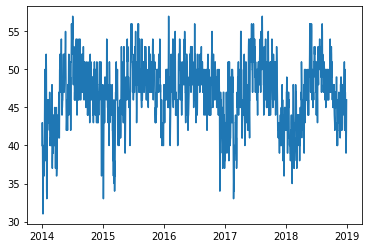

In [ ]:

plt.plot(df.AvgTemp)

In [ ]:
pip install pmdarima

     |████████████████████████████████| 1.4 MB 24.4 MB/s 
     |████████████████████████████████| 9.8 MB 46.8 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF:", dftest[0])
  print('2. p-value:',dftest[1])
  print('3. Num of lags:',dftest[2])
  print('4. num of observations used for regression and critical value calcualtion:',dftest[3])
  print('5. Critical values:')
  for key,val in dftest[4].items():
    print("\t",key, ": ",val)


In [ ]:
adf_test(df.AvgTemp)

1. ADF: -6.554680125068778
2. p-value: 8.675937480199557e-09
3. Num of lags: 12
4. num of observations used for regression and critical value calcualtion: 1808
5. Critical values:
	 1% :  -3.433972018026501
	 5% :  -2.8631399192826676
	 10% :  -2.5676217442756872


In [ ]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [ ]:
stepwise_fitting = auto_arima(df.AvgTemp,trace = True)
stepwise_fitting.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=8344.803, Time=3.25 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=10347.755, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=8365.701, Time=0.20 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=9136.225, Time=0.36 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19192.139, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=8355.947, Time=2.28 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=8356.308, Time=2.64 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=8347.117, Time=3.67 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=8317.613, Time=3.66 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=8330.191, Time=3.55 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=8312.479, Time=4.34 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=8332.193, Time=4.66 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=8317.480, Time=5.87 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=8307.633, Time=4.81 sec
 ARIMA(1,0,4)(0,0,0)[0] interce

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1821
Model:               SARIMAX(1, 0, 5)   Log Likelihood               -4139.359
Date:                Sat, 09 Apr 2022   AIC                           8294.718
Time:                        16:31:14   BIC                           8338.775
Sample:                             0   HQIC                          8310.972
                               - 1821                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.2372      0.370      3.340      0.001       0.511       1.963
ar.L1          0.9735      0.008    122.232      0.000       0.958       0.989
ma.L1         -0.1244      0.024     -5.233      0.000      -0.171      -0.078
ma.L2         -0.2191      0.024     -9.056      0.000      -0.266      -0.172
ma.L3         -0.2073      0.024     -8.649      0.000      -0.254      -0.160
ma.L4         -0.1360      0.023     -5.959      0.000      -0.181      -0.091
ma.L5         -0.0485      0.024     -1.987      0.047      -0.096      -0.001
sigma2         5.5112      0.173     31.871      0.000       5.172       5.850
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                20.49
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.17
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train = df.iloc[:-30]
test = df.iloc[-30:]


In [ ]:
train.shape

(1791, 5)

In [ ]:
test.shape

(30, 5)

In [ ]:
import statsmodels.api as sm

In [ ]:
model = sm.tsa.arima.ARIMA(train.AvgTemp,order=(1,0,5))
model_fit = model.fit()


In [ ]:
start = len(train)
end = len(train)+len(test)-1
pred = model_fit.predict(start = start, end=end, type='levels').rename('ARIMA predictions')

In [ ]:
pred

1791    44.754109
1792    44.987795
1793    45.388741
1794    45.721546
1795    45.863733
1796    45.874127
1797    45.884370
1798    45.894467
1799    45.904418
1800    45.914225
1801    45.923892
1802    45.933419
1803    45.942809
1804    45.952064
1805    45.961186
1806    45.970176
1807    45.979037
1808    45.987770
1809    45.996378
1810    46.004861
1811    46.013223
1812    46.021464
1813    46.029586
1814    46.037592
1815    46.045482
1816    46.053259
1817    46.060923
1818    46.068478
1819    46.075923
1820    46.083262
Name: ARIMA predictions, dtype: float64

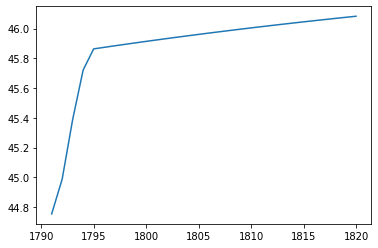

In [ ]:
plt.plot(pred)

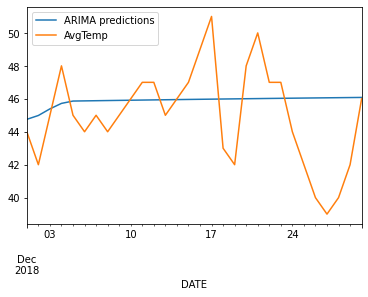

In [ ]:
index_future_dates = pd.date_range(start = '2018-12-01',end = '2018-12-30')
pred.index = index_future_dates
pred.plot(legend=True)
test.AvgTemp.plot(legend= True)

In [ ]:
from sklearn.metrics import mean_squared_error as MSE

In [ ]:
import math

In [ ]:
mse = MSE(test.AvgTemp,pred)
rmse = math.sqrt(mse)
print(rmse)

3.000464039240764


In [ ]:
test.AvgTemp.mean()


45.0

In [ ]:
pred.mean()

45.87761044293135